# MNIST 손글씨 - CNN v4
- 2 Conv2D layers ==> 2 Conv2D with padding layers
- 1 MaxPooling2D layer
- 1 Dropout(0.25) layer
- 1 Fully Connected Network layer
- 1 Dropout(0.5) layer
- 1 Output layer

In [17]:
import numpy as np
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

* 데이터 전처리

In [18]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [19]:
# X data: 0 ~ 1 사이의 값, 3차원 --> 4차원
X_train = X_train.reshape(-1, 28, 28, 1) / 255.
X_test = X_test.reshape(-1,28,28,1) / 255.

In [20]:
# One-hot encoding
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

- 모델 정의, 설정, 학습, 평가

In [21]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [22]:
model = Sequential([ 
    Conv2D(32, kernel_size=(3,3), padding="same", input_shape=(28,28,1),activation='relu'),
    Conv2D(64, (3,3), padding="same", activation='relu'),
    MaxPooling2D(),                         # MaxPooling2D(pool_size(2,2))
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 12544)             0         
                                                                 
 dense_2 (Dense)             (None, 512)               6423040   
                                                      

In [23]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
model_path = 'best-mnist-cnn-v4.h5'
checkpoint = ModelCheckpoint(model_path, save_best_only=True, verbose=1)
early_stop = EarlyStopping(patience=10)

In [26]:
hist = model.fit(
    X_train, Y_train, validation_split=0.2, epochs=100, batch_size=200, 
    callbacks=[checkpoint, early_stop], verbose=0
)


Epoch 00001: val_loss improved from inf to 0.05761, saving model to best-mnist-cnn-v4.h5

Epoch 00002: val_loss improved from 0.05761 to 0.04582, saving model to best-mnist-cnn-v4.h5

Epoch 00003: val_loss improved from 0.04582 to 0.04158, saving model to best-mnist-cnn-v4.h5

Epoch 00004: val_loss improved from 0.04158 to 0.03600, saving model to best-mnist-cnn-v4.h5

Epoch 00005: val_loss did not improve from 0.03600

Epoch 00006: val_loss improved from 0.03600 to 0.03488, saving model to best-mnist-cnn-v4.h5

Epoch 00007: val_loss did not improve from 0.03488

Epoch 00008: val_loss did not improve from 0.03488

Epoch 00009: val_loss did not improve from 0.03488

Epoch 00010: val_loss did not improve from 0.03488

Epoch 00011: val_loss improved from 0.03488 to 0.03331, saving model to best-mnist-cnn-v4.h5

Epoch 00012: val_loss did not improve from 0.03331

Epoch 00013: val_loss did not improve from 0.03331

Epoch 00014: val_loss did not improve from 0.03331

Epoch 00015: val_loss d

In [27]:
best_model = load_model(model_path)
best_model.evaluate(X_test, Y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0330 - accuracy: 0.9910


[0.033024076372385025, 0.9909999966621399]

- 훈련과정 시각화

In [28]:
y_acc = hist.history['accuracy']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_acc)+1)

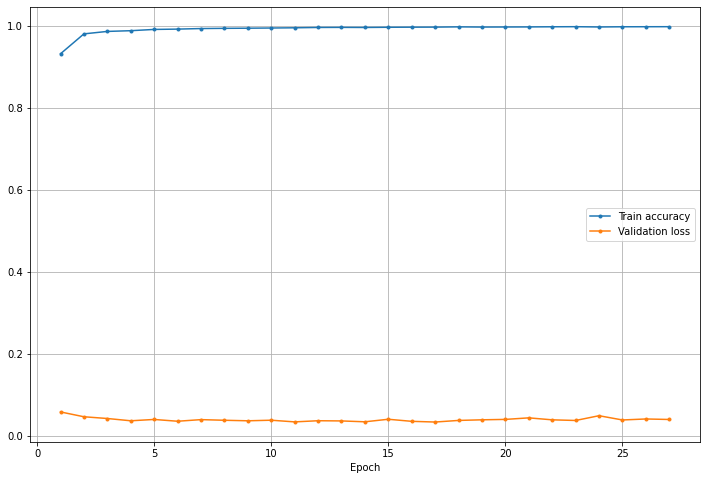

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.plot(xs, y_acc, 'o-', ms=3, label='Train accuracy')
plt.plot(xs, y_vloss, 'o-', ms=3, label = "Validation loss")
plt.legend()
plt.xlabel("Epoch")
plt.grid()
plt.show()